In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

type(x), x

2022-09-15 06:07:56.259828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 06:07:56.383347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 06:07:56.384094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 06:07:56.385845: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

(keras.engine.keras_tensor.KerasTensor,
 <KerasTensor: shape=(None, 28, 28, 4) dtype=float32 (created by layer 'conv2d')>)

In [3]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPool2D(2)(x)

type(x), x

(keras.engine.keras_tensor.KerasTensor,
 <KerasTensor: shape=(None, 14, 14, 16) dtype=float32 (created by layer 'max_pooling2d')>)

In [4]:
from  tensorflow.keras.layers import Flatten, Dense

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)

model = Model(inputs= input_tensor, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [5]:
from  tensorflow.keras.layers import Flatten, Dense

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs= input_tensor, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1081700   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010

In [6]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
  images = np.array(images / 255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

def get_preprocessed_ohe(images, labels):
  images, labels = get_preprocessed_data(images, labels)
  oh_labels = to_categorical(labels)

  return images, oh_labels

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, \
                              valid_size=0.15, random_state=2022):
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    tr_images, val_images, tr_oh_labels,val_oh_labels = \
      train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
  get_train_valid_test_set(train_images, train_labels, test_images, test_labels)

tr_images.shape, tr_oh_labels.shape, val_images.shape, \
  val_oh_labels.shape, test_images.shape, test_oh_labels.shape

((51000, 28, 28),
 (51000, 10),
 (9000, 28, 28),
 (9000, 10),
 (10000, 28, 28),
 (10000, 10))

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

2022-09-15 06:08:01.666481: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-09-15 06:08:02.874871: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


399/399 [==============================] - 10s 6ms/step - loss: 0.4299 - accuracy: 0.8484 - val_loss: 0.3010 - val_accuracy: 0.8966
Epoch 2/30
399/399 [==============================] - 2s 6ms/step - loss: 0.2625 - accuracy: 0.9051 - val_loss: 0.2547 - val_accuracy: 0.9113
Epoch 3/30
399/399 [==============================] - 2s 6ms/step - loss: 0.2097 - accuracy: 0.9233 - val_loss: 0.2381 - val_accuracy: 0.9174
Epoch 4/30
399/399 [==============================] - 2s 6ms/step - loss: 0.1722 - accuracy: 0.9358 - val_loss: 0.2127 - val_accuracy: 0.9260
Epoch 5/30
399/399 [==============================] - 2s 6ms/step - loss: 0.1391 - accuracy: 0.9495 - val_loss: 0.2274 - val_accuracy: 0.9220
Epoch 6/30
399/399 [==============================] - 2s 6ms/step - loss: 0.1124 - accuracy: 0.9594 - val_loss: 0.2318 - val_accuracy: 0.9198
Epoch 7/30
399/399 [==============================] - 2s 6ms/step - loss: 0.0861 - accuracy: 0.9686 - val_loss: 0.2421 - val_accuracy: 0.9239
Epoch 8/30
399/3

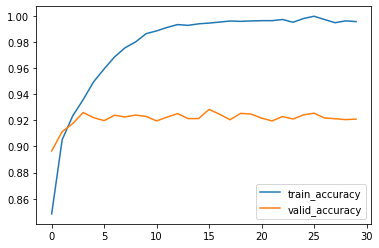

In [15]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='valid_accuracy')
#     plt.plot(history.history['loss'], label='train_loss')
#     plt.plot(history.history['val_loss'], label='valid_loss')
    plt.legend()
    
show_history(history)

In [14]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.9216


[0.6019170880317688, 0.9215999841690063]

In [16]:
from tensorflow.keras.layers import Dropout

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs= input_tensor, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout (Dropout)            (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1081

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 3s 6ms/step - loss: 0.4649 - accuracy: 0.8339 - val_loss: 0.3201 - val_accuracy: 0.8896
Epoch 2/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3063 - accuracy: 0.8875 - val_loss: 0.2747 - val_accuracy: 0.9060
Epoch 3/30
399/399 [==============================] - 2s 6ms/step - loss: 0.2577 - accuracy: 0.9052 - val_loss: 0.2550 - val_accuracy: 0.9083
Epoch 4/30
399/399 [==============================] - 3s 6ms/step - loss: 0.2247 - accuracy: 0.9165 - val_loss: 0.2370 - val_accuracy: 0.9136
Epoch 5/30
399/399 [==============================] - 2s 6ms/step - loss: 0.2009 - accuracy: 0.9264 - val_loss: 0.2178 - val_accuracy: 0.9223
Epoch 6/30
399/399 [==============================] - 2s 6ms/step - loss: 0.1825 - accuracy: 0.9321 - val_loss: 0.2079 - val_accuracy: 0.9258
Epoch 7/30
399/399 [==============================] - 2s 6ms/step - loss: 0.1624 - accuracy: 0.9390 - val_loss: 0.2177 - val_accuracy: 0.9190
Epoch 

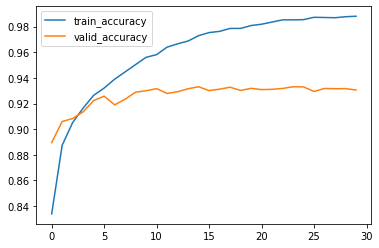

In [19]:
show_history(history)

In [20]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.9298


[0.337636798620224, 0.9297999739646912]

In [23]:
def create_model():
    input_tensor = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPool2D(2)(x)

    x = Dropout(rate=0.5)(x)
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs= input_tensor, outputs=output)
    model.summary()
    
    return model

In [24]:
model = create_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10816)             0   

In [25]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 4s 8ms/step - loss: 0.5037 - accuracy: 0.8200 - val_loss: 0.3230 - val_accuracy: 0.8836
Epoch 2/30
399/399 [==============================] - 3s 7ms/step - loss: 0.3408 - accuracy: 0.8754 - val_loss: 0.2765 - val_accuracy: 0.9033
Epoch 3/30
399/399 [==============================] - 3s 7ms/step - loss: 0.2947 - accuracy: 0.8900 - val_loss: 0.2504 - val_accuracy: 0.9142
Epoch 4/30
399/399 [==============================] - 3s 7ms/step - loss: 0.2682 - accuracy: 0.9012 - val_loss: 0.2392 - val_accuracy: 0.9127
Epoch 5/30
399/399 [==============================] - 3s 7ms/step - loss: 0.2439 - accuracy: 0.9097 - val_loss: 0.2215 - val_accuracy: 0.9184
Epoch 6/30
399/399 [==============================] - 3s 7ms/step - loss: 0.2284 - accuracy: 0.9159 - val_loss: 0.2160 - val_accuracy: 0.9218
Epoch 7/30
399/399 [==============================] - 3s 7ms/step - loss: 0.2124 - accuracy: 0.9198 - val_loss: 0.2099 - val_accuracy: 0.9249
Epoch 

40/40 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.9334


[0.21207275986671448, 0.9333999752998352]

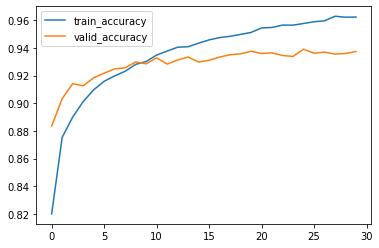

In [26]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

In [27]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
train_images = np.reshape(train_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))

train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=1)(input_tensor)

x.shape

2022-09-15 20:49:14.779810: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([None, 3, 3, 1])

In [2]:
input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(input_tensor)

x.shape

TensorShape([None, 5, 5, 1])

In [3]:
from tensorflow.keras.layers import ZeroPadding2D

input_tensor = Input(shape=(5, 5, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
padded_input.shape

TensorShape([None, 7, 7, 1])

In [4]:
x = Conv2D(filters=1, kernel_size=3, strides=1)(padded_input)

x.shape

TensorShape([None, 5, 5, 1])

In [6]:
input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2)(input_tensor)

x.shape

TensorShape([None, 2, 2, 1])

In [9]:
input_tensor = Input(shape=(5, 5, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)

x.shape

TensorShape([None, 3, 3, 1])

In [12]:
input_tensor = Input(shape=(6, 6, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2, padding='same')(input_tensor)

x.shape

TensorShape([None, 3, 3, 1])

In [13]:
input_tensor = Input(shape=(6, 6, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)

x.shape

TensorShape([None, 3, 3, 1])

In [14]:
input_tensor = Input(shape=(6, 6, 1))
padded_input = ZeroPadding2D(padding=((1, 0), (1, 0)))(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)

x.shape

TensorShape([None, 3, 3, 1])

In [16]:
input_tensor = Input(shape=(224, 224, 1))
x = MaxPooling2D(2)(input_tensor)

x.shape

TensorShape([None, 112, 112, 1])